In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
from scipy.io import wavfile
from scipy import spatial
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

import keras
from keras.layers import Conv1D, MaxPool2D, Flatten, LSTM, MaxPooling1D, Embedding
from keras.layers import Dropout, Dense, TimeDistributed, Activation, Bidirectional
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import model_from_json
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
import python_speech_features as psf

plt.rcParams['figure.figsize'] = 16,5

Using TensorFlow backend.


In [2]:
feelings= ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprised']
feel_val=[0,0,0,0,0,0,0]

In [3]:
json_file = open(r'C:\Users\KIIT\Pypy\Speech Processing\Emotion Detection\TORONTO\saved_models\Toronto_Male_Model_CNN_MLP_9933.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("TORONTO/saved_models/Toronto_Male_Model_CNN_MLP_9933.h5")
print("Loaded model from disk")
# feels= ['neutral', 'disgust', 'fear', 'happy', 'angry', 'sad', 'surprised']

Loaded model from disk


In [4]:
opt = keras.optimizers.adam(lr=0.00001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [5]:
# batch= 105
batch= 131
filepath='Test/Jawaharlal Nehru Freedom at Midnight.wav'
Test_title= 'Jawaharlal Nehru Freedom at Midnight'

## Batch Processing
#### Decimation in Time Domain  with Time Slicing: 4s


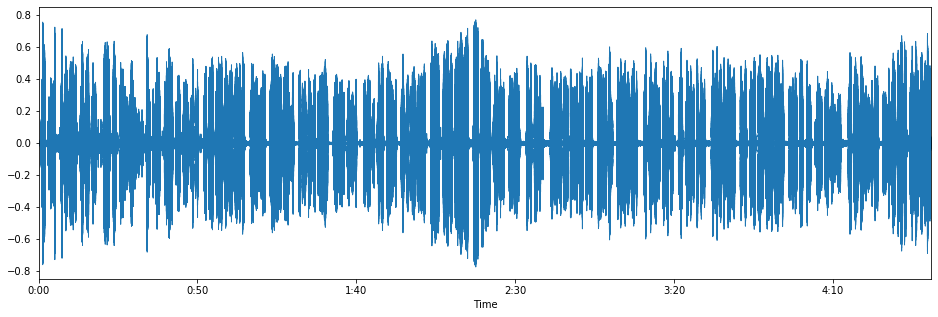

In [6]:
X, sampling_rate = librosa.load(filepath, res_type='kaiser_best', sr=22050)
temp= []
for i in range(0, X.shape[0]//(44100*2)):
    l, sr= librosa.load(filepath, res_type='kaiser_best', sr=22050, offset=(i*2), duration=4)
    l= l.tolist()
    temp.append(l)
temp= np.array(temp)
librosa.display.waveplot(X, sr=sampling_rate)
plt.show()

In [7]:
featurelive=[]
livedf2= []
for i in range(0, temp.shape[0]):
    # mfccs = np.mean(librosa.feature.mfcc(y=temp[i], sr=sampling_rate, n_mfcc=52),axis=0)
    dummy= np.mean(librosa.feature.mfcc(y=temp[i], sr=sampling_rate, n_mfcc=52),axis=0)[:batch]
    livedf2.append(dummy)
    live_test= np.array(livedf2)
    twodim= np.expand_dims(livedf2, axis=2)
livepreds= model.predict(twodim, batch_size=16, verbose=1)
livepreds= livepreds.argmax(axis=1)
livepreds = livepreds.astype(int).flatten()
for j in range(livepreds.shape[0]):
    feel_val[livepreds[j]]+=1

70/70 [==============================] - 0s 2ms/step


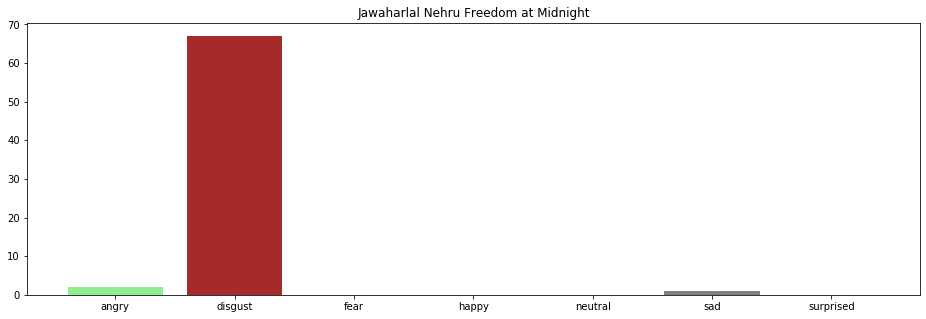

In [8]:
plt.bar(feelings, feel_val, color=['lightgreen', 'brown','orange', 'yellow', 'lightblue', 'grey', 'pink'])
plt.title(Test_title)
plt.show()

## Batch Processing
#### Decimation in Time Domain  with Time Slicing: 2s

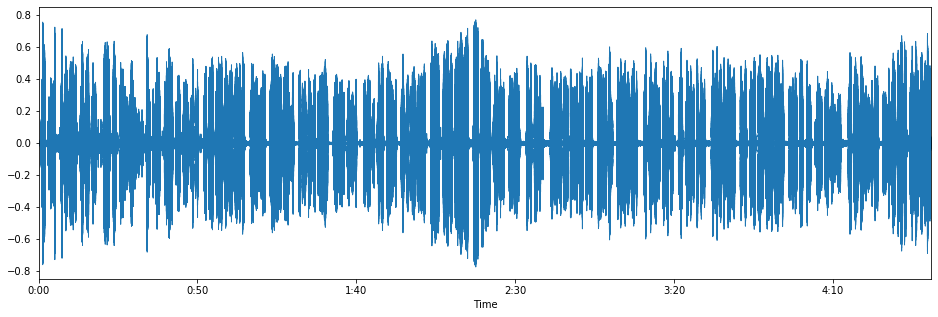

In [9]:
X, sampling_rate = librosa.load(filepath, res_type='kaiser_best', sr=22050)
temp= []
for i in range(0, X.shape[0]//(44100*1)):
    l, sr= librosa.load(filepath, res_type='kaiser_best', sr=22050, offset=(i), duration=2)
    l= l.tolist()
    temp.append(l)
temp= np.array(temp)
librosa.display.waveplot(X, sr=sampling_rate)
plt.show()

In [10]:
featurelive=[]
livedf2= []
for i in range(0, temp.shape[0]):
    mfccs= np.mean(librosa.feature.mfcc(y=temp[0], sr=sampling_rate, n_mfcc=52),axis=0)
    l= mfccs.tolist()
    for j in range(batch-len(l)):
        l.append(0)
    mfccs= np.array(l)
    dummy= mfccs[:batch]
    livedf2.append(dummy)
    live_test= np.array(livedf2)
    twodim= np.expand_dims(livedf2, axis=2)
livepreds= model.predict(twodim, batch_size=16, verbose=1)
livepreds= livepreds.argmax(axis=1)
livepreds = livepreds.astype(int).flatten()
for j in range(livepreds.shape[0]):
    feel_val[livepreds[j]]+=1

140/140 [==============================] - 0s 1ms/step


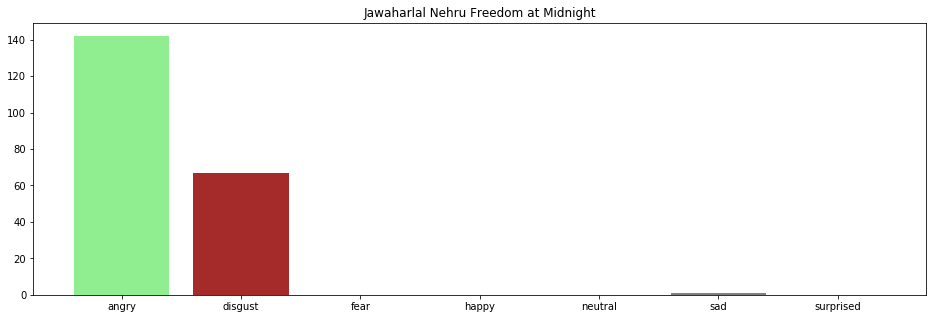

In [11]:
plt.bar(feelings, feel_val, color=['lightgreen', 'brown','orange', 'yellow', 'lightblue', 'grey', 'pink'])
plt.title(Test_title)
plt.show()

## Batch Processing
#### Decimation in Frequency Domain  with Batch Slicing: 131

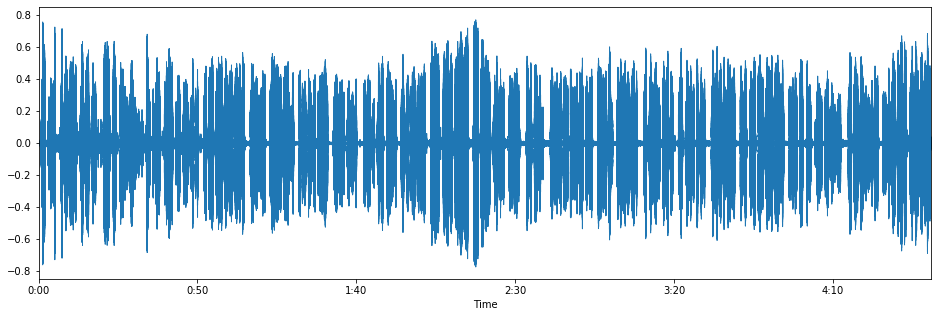

In [12]:
X, sampling_rate = librosa.load(filepath, res_type='kaiser_best', sr=22050*2)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sampling_rate, n_mfcc=13),axis=0)
librosa.display.waveplot(X, sr=sampling_rate)
plt.show()

In [13]:
temp=[]
for i in range(mfccs.shape[0]//batch):
    temp.append(mfccs[i*batch:(i+1)*batch])
if mfccs.shape[0] > len(temp)*batch:
    lo= mfccs[len(temp)*batch:]
    lo= lo.tolist()
    for i in range(len(lo),batch):
        lo.append(0)
    temp.append(lo)
twodim= np.expand_dims(temp, axis=2)
livepreds= model.predict(twodim, batch_size=16, verbose=1)
livepreds= livepreds.argmax(axis=1)
livepreds = livepreds.astype(int).flatten()
for j in range(livepreds.shape[0]):
    feel_val[livepreds[j]]+=1

185/185 [==============================] - 0s 2ms/step


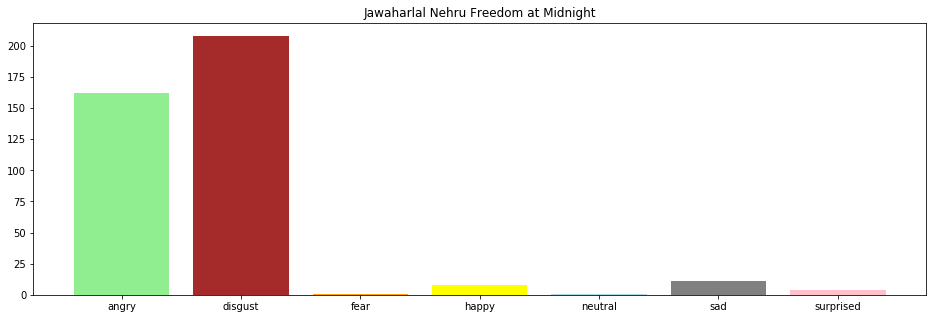

In [14]:
plt.bar(feelings, feel_val, color=['lightgreen', 'brown','orange', 'yellow', 'lightblue', 'grey', 'pink'])
plt.title(Test_title)
plt.show()